In [29]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.manifold import TSNE

In [30]:
fname = "240特徵值-亞東醫院 - correct heading.xlsx"

In [31]:
# 如果出現 Missing optional dependency 'xlrd'. 錯誤, 在 Anaconda 安裝 xlrd 即可

df=pd.ExcelFile(fname).parse('工作表1') 

In [32]:
df.head(3)

,Unnamed: 0,平均數,中間值,眾數,標準差,最小值,最大值,RMS,CV,平均數.1,...,RMS.28,CV.28,平均數.29,中間值.29,眾數.29,標準差.29,最小值.29,最大值.29,RMS.29,CV.29
0,20180115_12,-0.046786,-0.05,-0.10,0.067333,-0.14,0.11,0.080998,-1.439178,0.356429,...,125.720296,0.118774,3.267563,3.66,4.01,2.876546,-3.49,11.32,4.345337,0.880334
1,20180115_21,-0.180000,-0.24,-0.28,0.154056,-0.32,0.08,0.233040,-0.855868,-0.086923,...,125.681129,0.093897,8.497031,8.39,20.68,5.876040,-4.92,27.86,10.317831,0.691540
2,20180115_31,-0.167778,-0.16,-0.16,0.024388,-0.23,-0.12,0.169444,-0.145359,0.180000,...,125.215307,0.143233,2.397387,2.55,0.39,4.504218,-8.97,16.31,5.084553,1.878803


In [33]:
df.columns

Index(['Unnamed: 0', '平均數', '中間值', '眾數', '標準差', '最小值', '最大值', 'RMS', 'CV',
       '平均數.1',
       ...
       'RMS.28', 'CV.28', '平均數.29', '中間值.29', '眾數.29', '標準差.29', '最小值.29',
       '最大值.29', 'RMS.29', 'CV.29'],
      dtype='object', length=241)

In [34]:
dfX = df.drop(columns=['Unnamed: 0'])
dfX.head(3)

,平均數,中間值,眾數,標準差,最小值,最大值,RMS,CV,平均數.1,中間值.1,...,RMS.28,CV.28,平均數.29,中間值.29,眾數.29,標準差.29,最小值.29,最大值.29,RMS.29,CV.29
0,-0.046786,-0.05,-0.10,0.067333,-0.14,0.11,0.080998,-1.439178,0.356429,0.36,...,125.720296,0.118774,3.267563,3.66,4.01,2.876546,-3.49,11.32,4.345337,0.880334
1,-0.180000,-0.24,-0.28,0.154056,-0.32,0.08,0.233040,-0.855868,-0.086923,-0.08,...,125.681129,0.093897,8.497031,8.39,20.68,5.876040,-4.92,27.86,10.317831,0.691540
2,-0.167778,-0.16,-0.16,0.024388,-0.23,-0.12,0.169444,-0.145359,0.180000,0.03,...,125.215307,0.143233,2.397387,2.55,0.39,4.504218,-8.97,16.31,5.084553,1.878803


In [35]:
numpyX = dfX.values
print(numpyX.shape)

(44, 240)


In [36]:
dfY = df['Unnamed: 0']
dfY.head(3)

0    20180115_12
1    20180115_21
2    20180115_31
Name: Unnamed: 0, dtype: object

In [37]:
numpyY = dfY.values
print(numpyY.shape)

(44,)


In [38]:
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=500)

In [47]:
x1 = tsne.fit_transform(numpyX, numpyY)

In [48]:
# x1 = tsne.fit_transform(numpyX)

In [49]:
x1.shape

(44, 2)

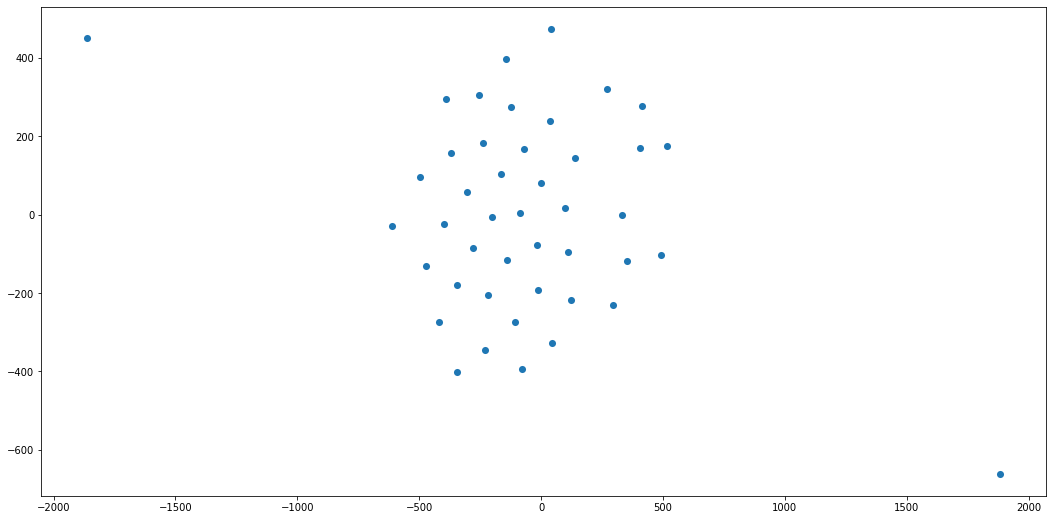

In [50]:
plt.figure(figsize=(18,9)) 
plt.scatter(x1[:, 0], x1[:, 1], s=50, lw=0)
plt.show()

In [52]:
x1.shape

(44, 2)

In [61]:
dfX1 = pd.DataFrame({'x': x1[:, 0], 'y': x1[:, 1]})
dfX1.head(5)

,x,y
0,-68.630432,166.588669
1,-203.196289,-5.724751
2,-107.759674,-273.989746
3,-163.185455,103.124176
4,46.283115,-328.431152


In [62]:
dfY = df['Unnamed: 0']
dfY.head(5)

0    20180115_12
1    20180115_21
2    20180115_31
3    20180115_42
4    20180122_11
Name: Unnamed: 0, dtype: object

In [64]:
df3 = pd.concat([dfY, dfX1], axis=1)
df3.head(5)

,Unnamed: 0,x,y
0,20180115_12,-68.630432,166.588669
1,20180115_21,-203.196289,-5.724751
2,20180115_31,-107.759674,-273.989746
3,20180115_42,-163.185455,103.124176
4,20180122_11,46.283115,-328.431152


In [65]:
df3.to_csv("out.csv", index = False)